## Train support vector machine (SVM) models using both linear and non-linear (e.g., RBF) kernel functions, and visualise the resulting classification boundaries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [3]:
# Generate non-linear dataset
X, y = datasets.make_moons(n_samples=300, noise=0.25, random_state=42)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

SVM training

In [4]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf', gamma=0.8, C=1)
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=0.8)

In [5]:
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

print("Accuracy (Linear Kernel):", round(accuracy_score(y_test, y_pred_linear), 3))
print("Accuracy (RBF Kernel):", round(accuracy_score(y_test, y_pred_rbf), 3))

Accuracy (Linear Kernel): 0.889
Accuracy (RBF Kernel): 0.889


In [6]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

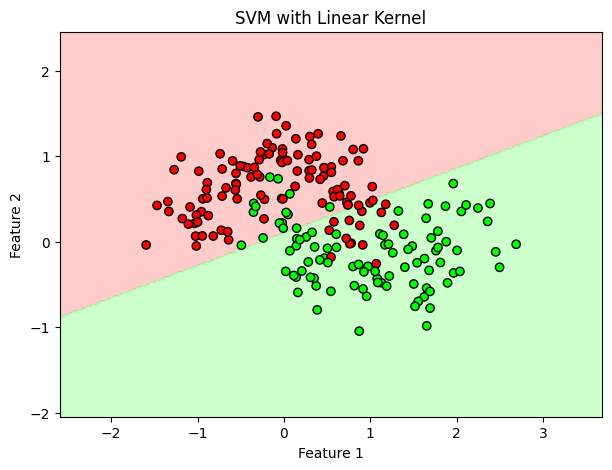

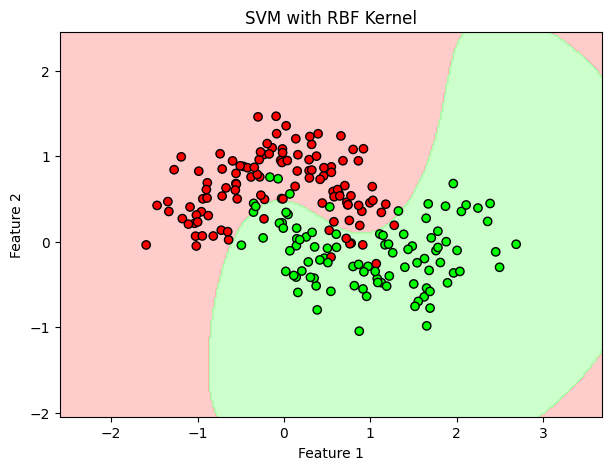

In [7]:
plot_decision_boundary(svm_linear, X_train, y_train, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_train, y_train, "SVM with RBF Kernel")